In [1]:
#Persiapan dan Memuat Data (Menjawab Pertanyaan #2)
# Install libraries jika diperlukan
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Jawaban Pertanyaan #2)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Task 1: Informasi dasar
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [3]:
#Duplikasi (Menjawab Pertanyaan #1, #2, dan #3)
# Mengidentifikasi duplikat (Jawaban Pertanyaan #1 & #2)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Menghapus duplikat (Jawaban Pertanyaan #3)
df.drop_duplicates(inplace=True)
print("Baris duplikat telah dihapus.")

Jumlah baris duplikat: 0
Baris duplikat telah dihapus.


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


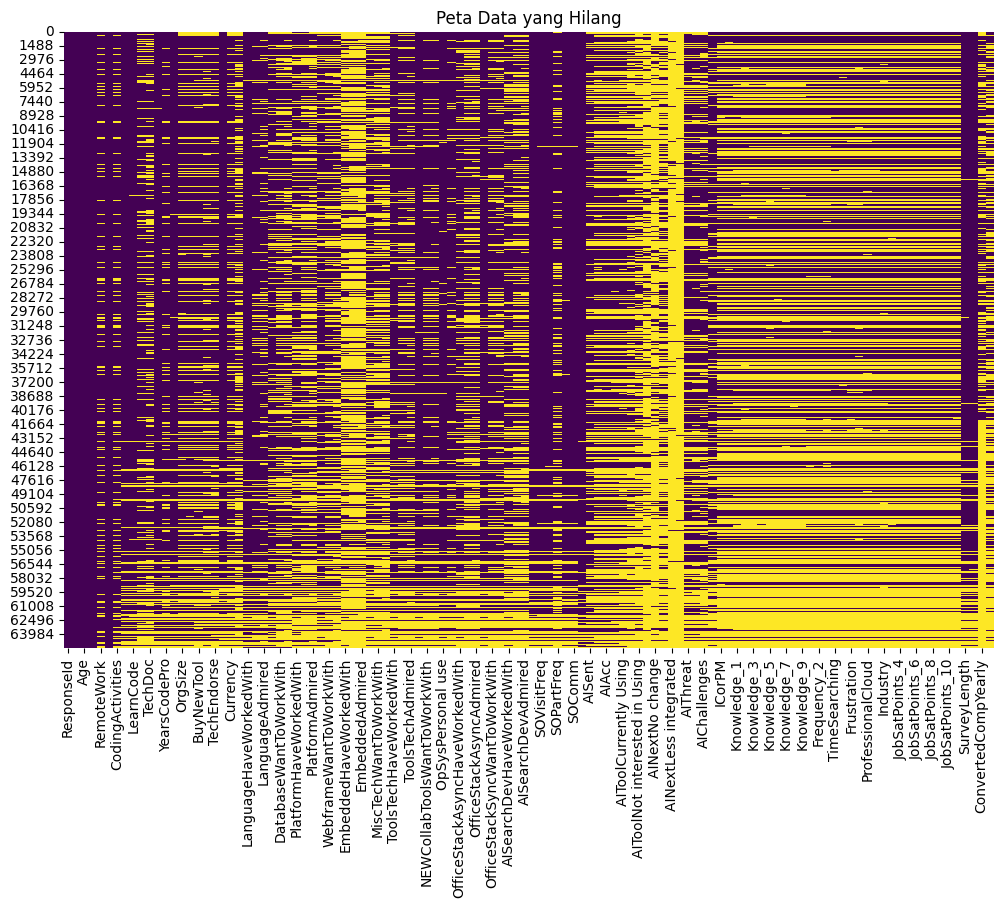

Jumlah baris kosong di kolom Employment: 0


In [4]:
#Mencari Missing Values (Menjawab Pertanyaan #4, #5, dan #8)

# Task 2: Identifikasi missing values per kolom (Jawaban Pertanyaan #4)
missing_data = df.isnull().sum()
print(missing_data)

# Task 3: Visualisasi Heatmap (Jawaban Pertanyaan #8)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Peta Data yang Hilang")
plt.show()

# Task 4: Menghitung baris kosong di kolom 'Employment' (Jawaban Pertanyaan #5)
missing_employment = df['Employment'].isnull().sum()
print(f"Jumlah baris kosong di kolom Employment: {missing_employment}")

Nilai kosong di Employment telah diisi dengan: Employed, full-time


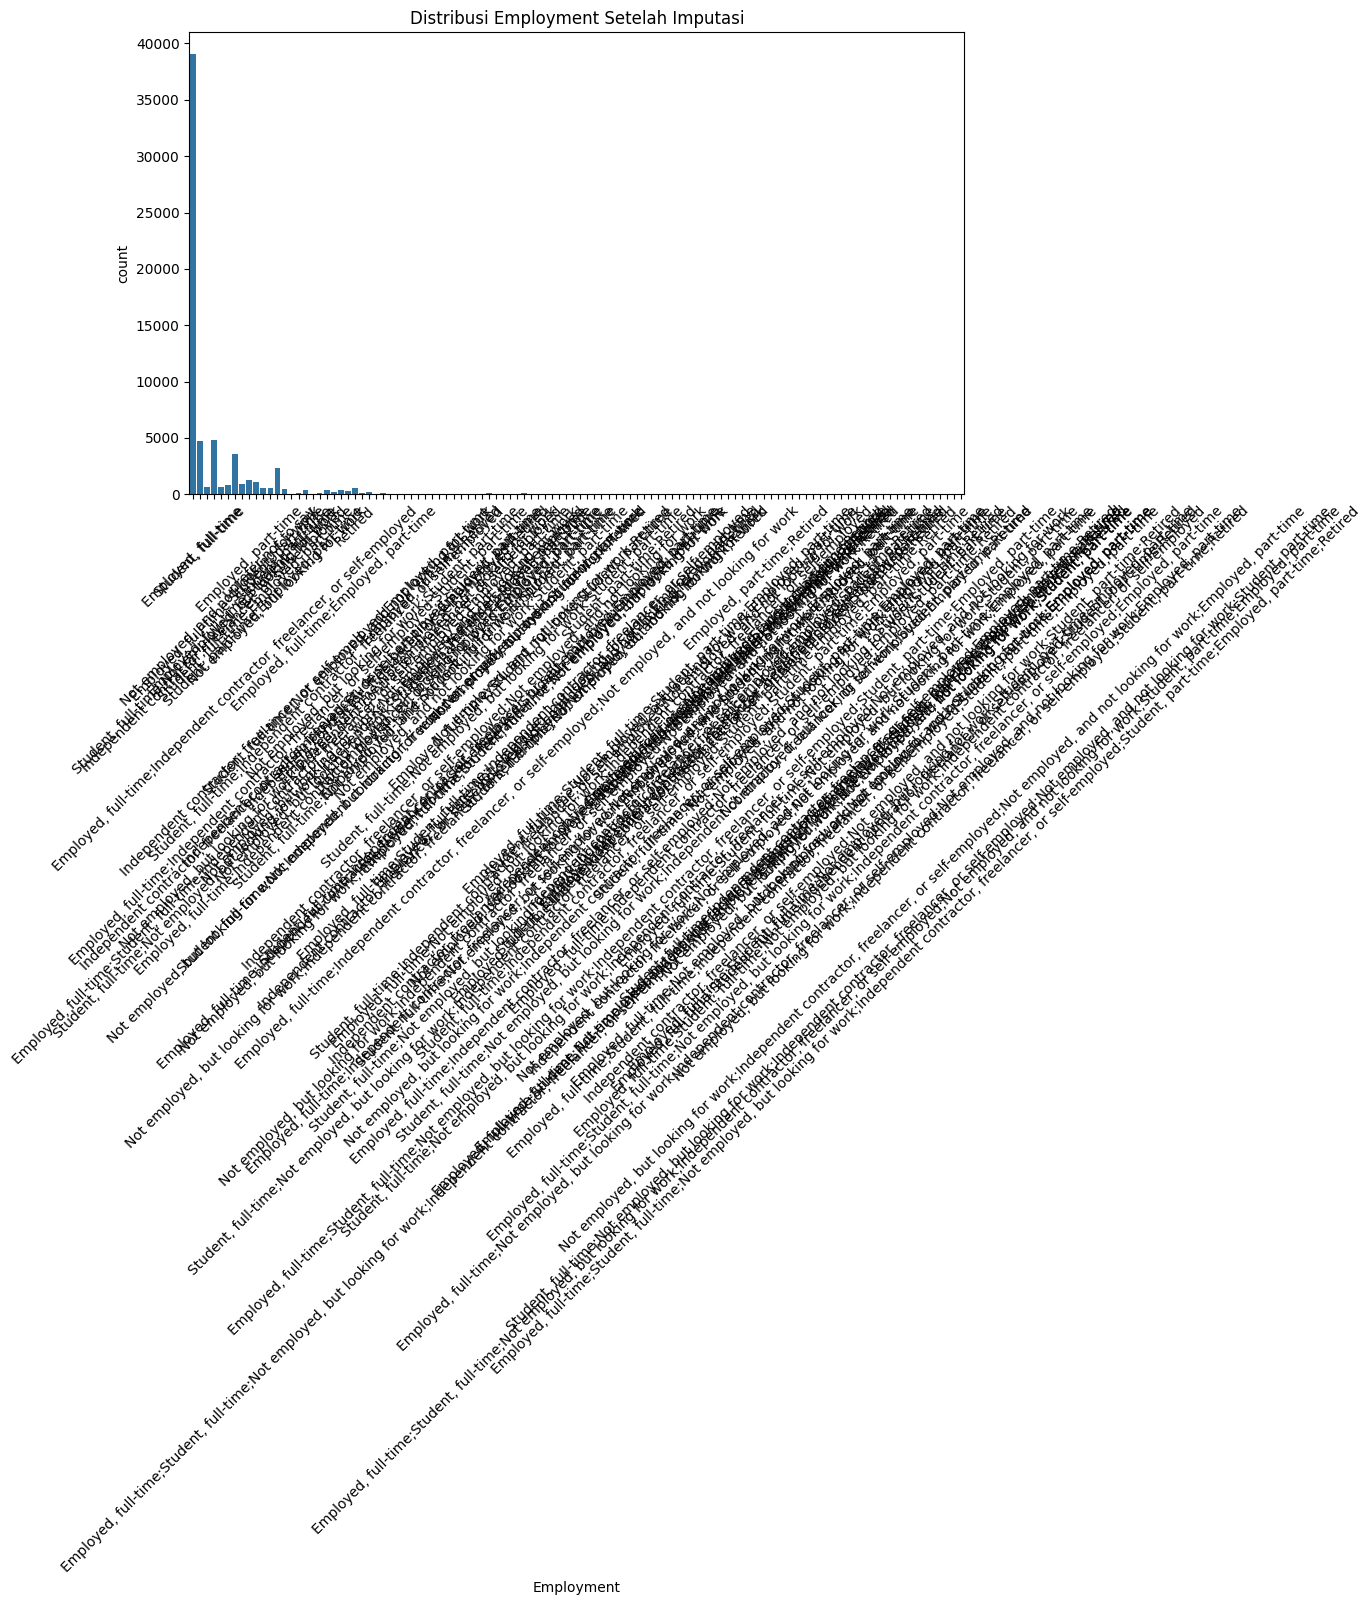

In [5]:
# Imputasi dan Kolom Baru (Menjawab Pertanyaan #6, #7, dan #8)

# Task 5 & 6: Imputasi (Jawaban Pertanyaan #6)
# Mencari nilai paling sering muncul (mayoritas)
most_freq_emp = df['Employment'].value_counts().idxmax()
# Mengisi nilai kosong
df['Employment'] = df['Employment'].fillna(most_freq_emp)
print(f"Nilai kosong di Employment telah diisi dengan: {most_freq_emp}")

# Jawaban Pertanyaan #7: Membuat kolom baru (Contoh: Menandai data yang diimputasi)
df['Employment_Imputed'] = df['Employment'].apply(lambda x: 1 if x == most_freq_emp else 0)

# Task 7: Visualisasi distribusi setelah imputasi (Jawaban Pertanyaan #8)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment')
plt.title("Distribusi Employment Setelah Imputasi")
plt.xticks(rotation=45)
plt.show()